# Bike Sharing Assignment

### Assignment specific Imports

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Statistical model package
import statsmodels
import statsmodels.api as sm

# Skit learn package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Read the "day" dataset

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Plot the correlation matrix showing correlation between the independent and dependent variables

In [4]:
# Check correlation between dependent variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.413587,0.866026,0.498251,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000,-0.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-0.000000,1.000000,-0.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,0.831032,-0.000000,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-0.010868,0.008195,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-0.003081,-0.005466,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,0.013762,-0.002945,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,0.021306,-0.050322,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,0.333361,0.048789,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.342014,0.047215,0.226430,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


### Visualizing relationship between the dependent and independent variables

In [ ]:
# PairPlots
sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

### Analysis process
#### 1. Prepare the data - data clean up (remove NULLs), remove redundant columns from the dataframe (remove unnecessary/redundant features). Make a conscious decision while removing the features - this is based out of analysis of the trained model.
#### 2. With the available feature list, split the dataframe into train and test dataset - follow a 70% - 30% split i.e. 70% of the given dataset is training dataset.
#### 3. Perform scaling over the numeric features. NOTE: Do not scale the feature values that are binary i.e 0 or 
#### 4. Use Recursive Feature Elimination (RFE) technique to ease the process of selecting the most significant features
#### 5. Train the model with the features selected from step 4.
#### 6. Analyse the model - remove the ones with p-value > 0.05 and/or VIF > 5.0.
#### 7. Repeat 1-6 until p-values and VIF of all the independent variables are < 0.05 and < 5.0 respectively.

## Data Preparation

### General Steps
#### 1. Remove null readings
#### 2. Creating Dummy Variables
#### 3. Remove redundant independent variables
   >1. Remove the definite ones - 'casual' and 'registered' since the target variable 'cnt' is sum of these two
   >2. Remove variables as part of an iterative excercise of analysis and removal

### Data Cleaning - filtering out NULLs

In [ ]:
# Data Cleaning - filtering out Nulls/NaNs if any
df.isnull().sum()

### Creating Dummy Variables

#### a. Weathersit must be converted to dummy variables since the feature values 1, 2, 3, 4 doesn't seem to have an order and cannot be used as is for building the model
> We can define three levels to Weathersit - Mist, Rain, and Snow meaning - 
<br>
> Clear when Mist=0, Rain=0, Snow=0
<br>
> Mist  when Mist=1, Rain=0, and Snow=0
<br>
> Rain  when Mist=0, Rain=1, and Snow=0
<br>
> Snow  when Mist=0, Rain=0, and Snow=1
<br>
<br>
> Define a dictionary:
<br>
weather_sit = {1: "Clear", 2: "Mist", 3: "Light_Rain_Snow", 4: "Snow"} that defaults to Clear weather situation
#### b. Season must be converted to dummy variables since the feature values 1, 2, 3, 4 doesn't seem to have an order and cannot be used as is for building the model
> We can define three levels to Season - Spring, Summer and Fall
<br>
> Winter when Spring=0, Summner=0, Fall=0
<br>
> Spring when Spring=1, Summer=0, Fall=0
<br>
> Summer when Spring=0, Summer=1, Fall=0
<br>
> Fall when Spring=0, Summer=0, Fall=1
<br>
<br>
> Define a dictionary:
<br>
> season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"} that defaults to Winter season
NOTE: Data with Fall condition is not available - we can merge Fall and Winter to state that Fall was too short.

In [7]:
# Weathersit
# num_rows = len(df.index)
# weather_sit = {"Mist": np.zeros(num_rows), "Rain": np.zeros(num_rows), "Snow": np.zeros(num_rows)}
# weather_sit = pd.DataFrame(weather_sit)
# # Concat weather_sit columns to the day dataframe
# df = pd.concat([df, weather_sit], axis=1)
weather_sit = {1: "Clear", 2: "Mist", 3: "Light_Rain_Snow", 4: "Snow"}
df['weathersit'] = df['weathersit'].map(weather_sit)
df.head()

In [8]:
# Let's drop the first column from status df using 'drop_first = True'
weather_status = pd.get_dummies(df['weathersit'], drop_first=True)
weather_status

,Light_Rain_Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [9]:
df = pd.concat([df, weather_status], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Rain_Snow,Mist
0,1,01-01-2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [10]:
# Drop 'weathersit' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Rain_Snow,Mist
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


### Similarly, create dummy variables for the 'season' feature

In [11]:
season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Fall_Winter"}
df['season'] = df['season'].map(season)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Rain_Snow,Mist
0,1,01-01-2018,Spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,Spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,Spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,Spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,Spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [12]:
# Let's drop the first column from status df using 'drop_first = True'
season_status = pd.get_dummies(df['season'], drop_first=True)
season_status = season_status.drop('Spring', axis=1)
season_status

,Fall_Winter,Summer
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
725,0,0
726,0,0
727,0,0
728,0,0


In [13]:
df = pd.concat([df, season_status], axis=1)
# Drop 'season' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Rain_Snow,Mist,Fall_Winter,Summer
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0


### Removing features
### Observations:

### 1st Iteration

>Initial removal
<br>
>> rem_cols = ['instant', 'dteday', 'casual', 'registered']
<br>
> --> R-squared is 0.821! mnth has a p-value of 0.028 and VIF of 3

### 2nd Iteration

> Try removing mnth to see how overall VIF and p-values vary, and ofcourse R-squared
<br>
>> rem_cols = ['instant', 'dteday', 'casual', 'registered', 'mnth']
<br>
> --> Removing month improves R-squared to 0.828! all VIFs are less than 2. 
<br>
> This clearly means model without month does best in predicting cnt

In [14]:
# Removing unncessary columns for analysis

# 1st Iteration
# Initial removal
# rem_cols = ['instant', 'dteday', 'casual', 'registered']
# --> R-squared is 0.821! mnth has a p-value of 0.028 and VIF of 3

# 2nd Iteration
# Try removing mnth to see how overall VIF and p-values vary, and ofcourse R-squared
rem_cols = ['instant', 'dteday', 'casual', 'registered', 'mnth']
# Removing month improves R-squared to 0.828! all VIFs are less than 2. 
# This clearly means model without month does best in predicting cnt


df_n = df.drop(rem_cols, axis=1)
df_n.head(10)

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Rain_Snow,Mist,Fall_Winter,Summer
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0
5,0,0,4,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,0
6,0,0,5,1,8.057402,10.44195,49.8696,11.304642,1510,0,1,0,0
7,0,0,6,0,6.765000,8.11270,53.5833,17.875868,959,0,1,0,0
8,0,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0
9,0,0,1,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,0


### Splitting the data into Training and Test set

In [15]:
# Splitting data into train and test set
df_train, df_test = train_test_split(df_n, train_size = 0.7, test_size = 0.3, random_state = 100)

### Applying MinMax Scaling to a specific set of variables

In [16]:
# Apply scaling to the numeric columns
scaler = MinMaxScaler()
# Initial
# num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Subsequent Iteration
num_vars = ['weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Rain_Snow,Mist,Fall_Winter,Summer
653,1,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0
576,1,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0
426,1,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0
728,1,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0
482,1,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1


### Dividing dataframe into dependent ('cnt') and independent variables

In [17]:
# Dividing dataframe into dependent variable and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

### Run a recursive feature elimination (RFE) method to select the most significant features

In [18]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [19]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Rain_Snow', True, 1),
 ('Mist', True, 1),
 ('Fall_Winter', True, 1),
 ('Summer', True, 1)]

In [20]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp'], dtype='object')

### Train the model (multilinear regression)

In [21]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

### Analyze the model
> #### Parameters to look out for - 
> 1. R-squared - more the better, closer to 1.0 indicates a good fit
> 2. p-values of the variables
> 3. VIF values - indicative of multicollinearity of independent variables (features)
> 
> #### Considerations:
<br>
> Conditions: 
<br>
> p-value < 0.05 : accept variable
<br>
>VIF > 5.0       : reject variable

### Summarize the model

In [22]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.26e-183
Time:                        17:23:41   Log-Likelihood:                 486.93
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     499   BIC:                            -905.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1807      0.029     

### Calculate the VIF values for all the independent variables in consideration

In [23]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.01
5,hum,1.87
8,Mist,1.56
9,Fall_Winter,1.25
7,Light_Rain_Snow,1.24
4,temp,1.23
6,windspeed,1.18
10,Summer,1.14
1,yr,1.03
3,weekday,1.03


### Residual Analysis
> A model is assumed to be a good fit/follows linear model assumptions - the residues i.e. error terms must follow a normal distribution centered at 0 i.e. mean = 0

Text(0.5, 0, 'Errors')

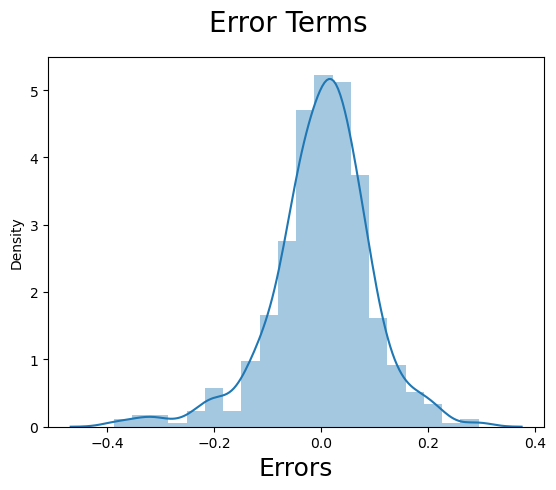

In [24]:
# Residual Analysis
y_train_cnt = lm.predict(X_train_rfe)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Analysis with Q-Q plot

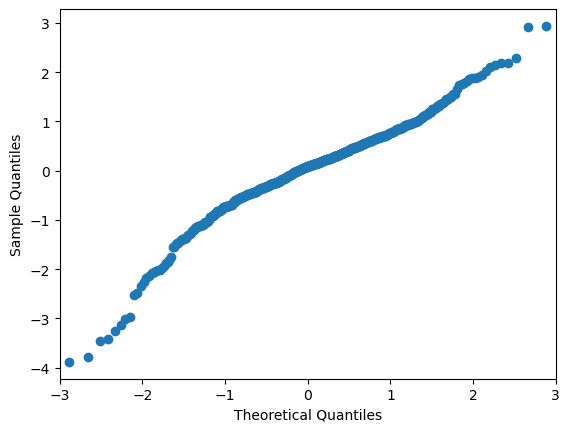

In [25]:
# Check if the error terms follow a normal distribution
fig = sm.qqplot(10*(y_train - y_train_cnt))
plt.show()

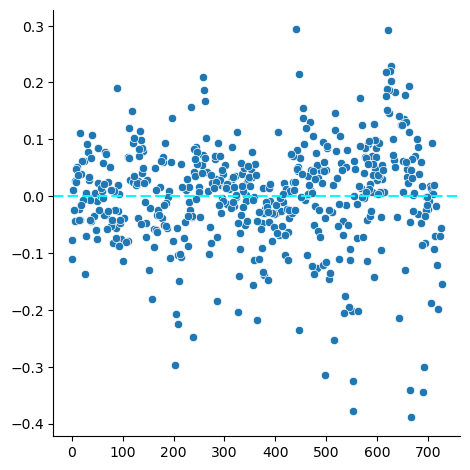

In [26]:
g = sns.relplot(data=y_train - y_train_cnt)
g.ax.axline(xy1=(0, 0), slope=0, color="cyan", dashes=(5, 2))

#### Durbin-Watson-Test

In [27]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(y_train - y_train_cnt)

2.0307557270157477

## Model Equation is - 
## 0.1807 + 0.2302*yr - 0.0785*holiday + 0.0479*weekday + 0.5947*temp - 0.1393*hum - 0.1934*windspeed - 0.2392*Light_rain_snow - 0.0542*Mist + 0.1367*Fall_Winter + 0.0769*Summer

### Some Analysis:
### Categorical Variables : year, holiday, weekday, Light_rain_snow, Mist, Fall_Winter, and Summer
### Numeric Variabes : temperature, humidity, and windspeed

### Making Predictions

In [28]:
num_vars_pred = ['weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars_pred] = scaler.transform(df_test[num_vars_pred])
df_test.head()


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Rain_Snow,Mist,Fall_Winter,Summer
184,0,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0
535,1,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1
299,0,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,1,0
221,0,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0
152,0,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1


In [29]:
y_test = df_test.pop('cnt')
X_test = df_test


# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

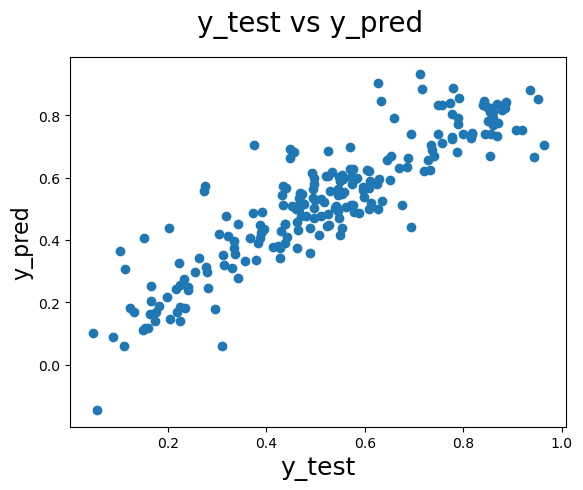

In [30]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7964946157245145